<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

# Simple Regression

For simple linear regresion, we focus on two parameters: intercept, and slope. The intercept is the value of the response variable when the predictor is 0. If we do not have any predictors(i.e. no other clues), the average of response variable is a common choise for estimation.

There are many ways to get these two parameters in Python. You can check this [blog](https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/) to choose your favorite. Here I will use [linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) function from scipy, and [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) function from statsmodel.

> Example:
Does people like you because you give them money?

In [0]:
#from scipy
money  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #predictor
liking = np.array([2.2, 2.8, 4.5, 3.1, 8.7, 5.0, 4.5, 8.8, 9.0, 9.2]) #response

slope, intercept, correlation, pval, stderror=st.linregress(money, liking)
rsquared = correlation**2

result = pd.DataFrame([slope, intercept, correlation, pval, stderror, rsquared], index='slope, intercept, correlation, pval, stderror, rsquared'.split(', '), columns=['values']).round(4)
display(result)

,values
slope,0.7782
intercept,1.5000
correlation,0.8303
pval,0.0029
stderror,0.1847
rsquared,0.6893


From correlation of 0.8303, there is a strong positive correlation: the more money you give someone, the more they like you. But even if we do not give them any money, i.e. predictor =0, people like you an amount of 1.50 any way. Furthermore, the r-squared explains how well the predictor describes the response variable. And the p value of 0.0029 shows this model is significant.

In [0]:
#from statsmodel
import statsmodels.api as sm
money = sm.add_constant(money)
results = sm.OLS(liking, money).fit()
money = money[:, 1]
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     17.75
Date:                Thu, 13 Feb 2020   Prob (F-statistic):            0.00294
Time:                        15:09:29   Log-Likelihood:                -18.248
No. Observations:                  10   AIC:                             40.50
Df Residuals:                       8   BIC:                             41.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5000      1.146      1.309      0.2

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


From statsmodel, Statsmodel has a comprehensive summary that is useful for analysis. `R-squared:` tells us how much of the variance in the response variable (liking) is explained by the predictor variable (money); `Prob (F-statistic)` gives the probability of observations given all regression coefficients equal zero is true,i.e. there will be no relationship between money and liking. Under 0.05 significance level, we will reject the null hypothesis and conclude this model is significant. The parameters are returned with P value indicating their significance as well(ho: each parameter is zero). If we have more predictors, this table will be useful for variable selection.



## Testing Assumptions

1.  The relationship between the predictor and response variable is linear. 
2.  Homocedasticity. To check this we should make sure the variation in residuals is roughly even at all levels of the predictor and response variables.
3.  Residuals are normally distributed. This means that the most common values are around zero, with fewer values as we move higher and lower than zero.
4.  Residuals cannot be related to each other.

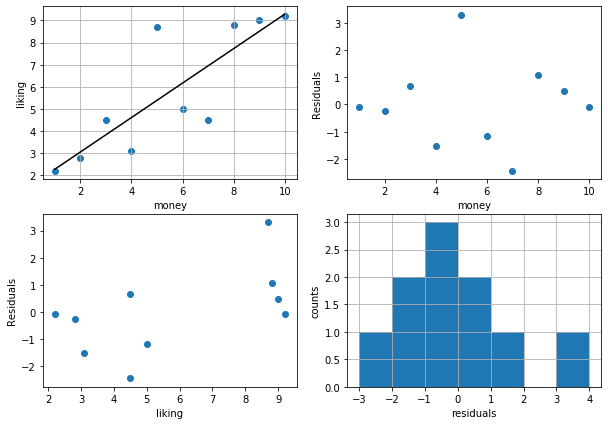

In [0]:
import matplotlib.pyplot as plt

residuals = results.resid
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axes[0, 0].scatter(money, liking)
axes[0, 0].plot(money, money*slope+intercept, 'k-')
axes[0, 0].set(xlabel='money', ylabel='liking')
axes[0, 0].grid()
axes[0, 1].scatter(money, residuals)
axes[0, 1].set(xlabel='money', ylabel='Residuals')
axes[1, 0].scatter(liking, residuals)
axes[1, 0].set(xlabel='liking', ylabel='Residuals')
axes[1, 1].hist(residuals, align='mid', bins=[-3,-2,-1,0,1,2,3,4])
axes[1, 1].set(xlabel='residuals', ylabel='counts')
axes[1, 1].grid()

plt.show()

You can see from the plots that while the residuals seem fairly even on the 'money' plot, there is a slight pattern in the 'liking' plot, such that residuals seem to be larger at higher levels of liking, and lower at lower levels of liking. This pattern suggests that our data might not entirely meet the assumption of linearity or homoscedasticity.

In the histogram, the residuals take a kind of a pyramid shape, with most of the values around zero, and fewer values as you move away from zero. This means they're normally distributed, except for the one outlier between 3 and 4.

## Making Predictions

If all the assumptions are met and the model is significant, we will be able to make prediction on two levels of intervals:
1.  Prediction Intervals
2.  Confidence Intervals

In [0]:
newdata=[1, 3] #money=3, add the constant=1 manually
results.get_prediction(newdata).summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.834545,0.703339,2.212643,5.456448,-0.360403,8.029494


The the last cells `obs_ci_lower` and `obs_ci_upper` are the range where true 'liking' score that someone from our **sample** is likingly to give, at 95% of confidence interval.
This means we are 95% sure that if we gave someone from our sample 3 units of money, they would like us somewhere between -0.36 and 8.03. That's quite a wide range.

The middle two cells `mean_ci_lower` and `mean_ci_upper` are the range of scores which our **population** are likely to give.
We're 95% sure that the mean amount that someone would like us if we gave them 3 units of money in the population falls between 2.12 and 5.46. This is quite a bit narrower than the prediction interval.